In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as st
import warnings
warnings.filterwarnings("ignore")

In [172]:
df = pd.read_csv("DS_C12_S2_Classification_BankChurn_Data_Project.csv")
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


<AxesSubplot:ylabel='Age'>

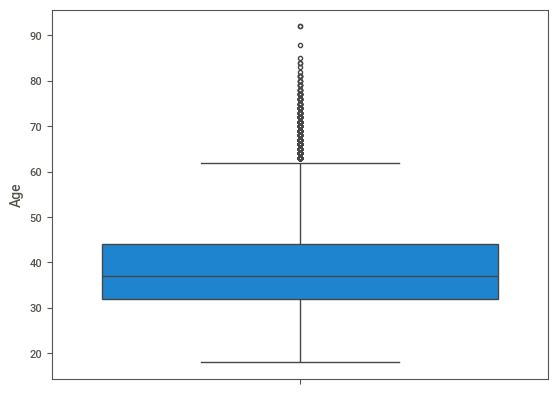

In [173]:
sns.boxplot(df['Age'])

In [174]:
df.shape

(10000, 13)

In [175]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


# Auto EDA with Klib liabrary

In [177]:
! pip install klib

In [178]:
import klib

In [179]:
df=klib.data_cleaning(df)

Shape of cleaned data: (10000, 13) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.7 MB (-70.71%)



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       10000 non-null  int32   
 1   surname           10000 non-null  string  
 2   credit_score      10000 non-null  int16   
 3   geography         10000 non-null  category
 4   gender            10000 non-null  category
 5   age               10000 non-null  int8    
 6   tenure            10000 non-null  int8    
 7   balance           10000 non-null  float32 
 8   num_of_products   10000 non-null  int8    
 9   has_cr_card       10000 non-null  int8    
 10  is_active_member  10000 non-null  int8    
 11  estimated_salary  10000 non-null  float32 
 12  exited            10000 non-null  int8    
dtypes: category(2), float32(2), int16(1), int32(1), int8(6), string(1)
memory usage: 293.6 KB


# EDA with Swtviz

In [13]:
! pip install sweetviz

In [14]:
import sweetviz as sv

In [15]:
my_sv = sv.analyze(df)
my_sv.show_html('my_sv.html')

                                             |                                             | [  0%]   00:00 ->…

Report my_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
#### Special character

In [17]:
for i in df.columns:
    if(' ?' in df[i].value_counts().index):
        df[i] = df[i].replace(' ?',np.nan,regex=False)
df.isnull().sum()

customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [18]:
df.columns

Index(['customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age',
       'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [19]:
new_df = pd.DataFrame()
new_df.index = ['count','minimum','maximum','myrange','Q1','Q3','IQR','UpperFence','LowerFence']

In [20]:
def finding_ol(i,c):
    val = df.loc[:,c]
    count = len(val)
    minimum = val.min()
    maximum = val.max()
    myrange = maximum - minimum
    
    Q1 = val.quantile(0.25)
    Q3 = val.quantile(0.75)
    IQR = Q3 - Q1
    UpperFence = Q3 + (1.5*IQR)
    LowerFence = Q1 - (1.5*IQR)
    
    new_df.insert(i,column=c,value=[count,minimum,maximum,myrange,Q1,Q3,IQR,UpperFence,LowerFence])

In [21]:
j = {0:'age'}

In [22]:
for i,c in j.items():
    finding_ol(i,c)

In [23]:
df.shape

(10000, 13)

In [24]:
new_df

,age
count,10000.0
minimum,18.0
maximum,92.0
myrange,74.0
Q1,32.0
Q3,44.0
IQR,12.0
UpperFence,62.0
LowerFence,14.0


In [25]:
treat_lf = pd.DataFrame(np.arange(10000))

In [26]:
for i,c in j.items():
    dummy_df = df.loc[:,c]
    LF = new_df.loc["LowerFence",c]
    r=dummy_df.drop(np.where(dummy_df<LF)[0]).reset_index(drop=True)
    treat_lf.insert(i,column=c,value=r)   

In [27]:
treated_uf_lf = pd.DataFrame(np.arange(10000))

In [28]:
for i,c in j.items():
    dummy_df = treat_lf.loc[:,c]
    UF = new_df.loc["UpperFence",c]
    r = dummy_df.drop(np.where(dummy_df>UF)[0]).reset_index(drop=True)
    treated_uf_lf.insert(i,column=c,value=r)

In [29]:
for i,c in j.items():
    df[c] = treated_uf_lf[c].fillna(treated_uf_lf[c].median())

<AxesSubplot:ylabel='age'>

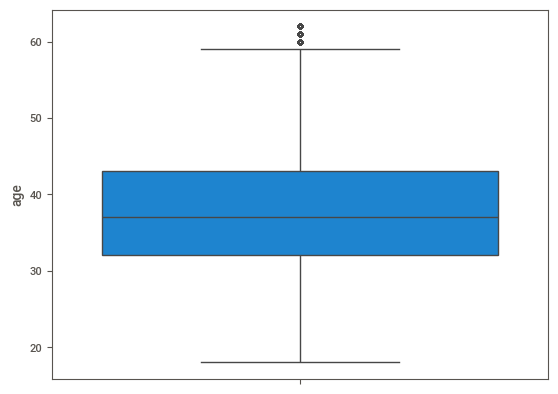

In [30]:
sns.boxplot(df['age'])

In [31]:
categorical = df.select_dtypes(include='category')
numerical = df.select_dtypes(include='number')

In [32]:
categorical

,geography,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [33]:
def age(x):
    if x>=0 and x<=20:
        return 'below 20'
    if x>20 and x<=30:
        return '20 to 30'
    if x>30 and x<=40:
        return '30 to 40'
    if x>40 and x<=50:
        return '40 to 50'
    if x>50 and x<=60:
        return '50 to 60'
    if x>60:
        return 'Above 60'
df['age_cat'] = df['age'].apply(age)

In [34]:
df['geography'].replace({'France':'france','Germany':'germany','Spain':'spain','fra':'france','GERMANY':'germany','gernamy':'germany','ger':'germany'}, inplace=True)

# UNIVARIATE

Text(0.5, 1.0, 'Ratio of Attrited and Existing customers')

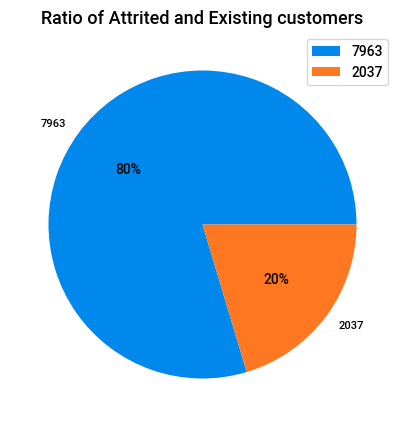

In [35]:
txt = df['exited'].value_counts().index
cnt = df['exited'].value_counts()
plt.figure(figsize=(7,5))
plt.pie(cnt,labels=cnt,autopct='%2.f%%')
plt.legend()

plt.title('Ratio of Attrited and Existing customers',size=13)

Text(0.5, 1.0, 'Ratio of Active and Not in Active Members')

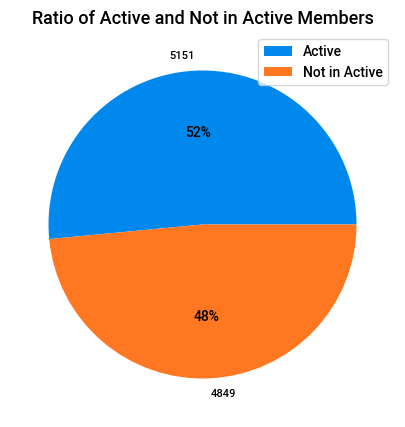

In [180]:
cnt2 = df['is_active_member'].value_counts()
txt2 = df['is_active_member'].value_counts().index
plt.figure(figsize=(7,5))
plt.pie(cnt2,labels=cnt2,autopct='%2.f%%')
plt.legend(['Active','Not in Active'])

plt.title('Ratio of Active and Not in Active Members',size=13)

In [37]:
df.is_active_member.value_counts()

1    5151
0    4849
Name: is_active_member, dtype: int64

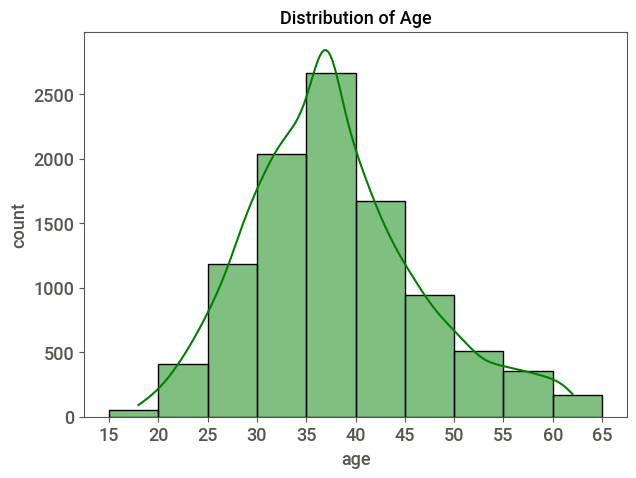

In [38]:
plt.figure(figsize=(7,5))
my_bins = range(15, 70, 5)
sns.histplot(df['age'], bins=my_bins, edgecolor='black',color='green',kde=True)  # Adjust the range based on your data
plt.xlabel('age',size=13)
plt.ylabel('count',size=13)
plt.title('Distribution of Age',size=13)
plt.xticks(range(15, 70,5 ),size=13) 
plt.yticks(size=13)

plt.show()

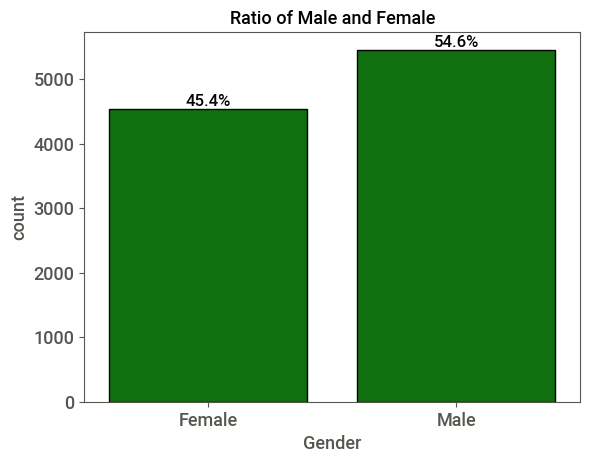

In [39]:
ax=sns.countplot(x=df['gender'], edgecolor='black',color='green')
total = len(df['gender'])
for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), va='bottom', ha='center', size=12)

plt.xlabel('Gender', size=13)
plt.ylabel('count', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title('Ratio of Male and Female', size=13)
plt.show()

In [40]:
df['geography'].replace({'France':'france','Germany':'germany','Spain':'spain','fra':'france','GERMANY':'germany','gernamy':'germany','ger':'germany'}, inplace=True)

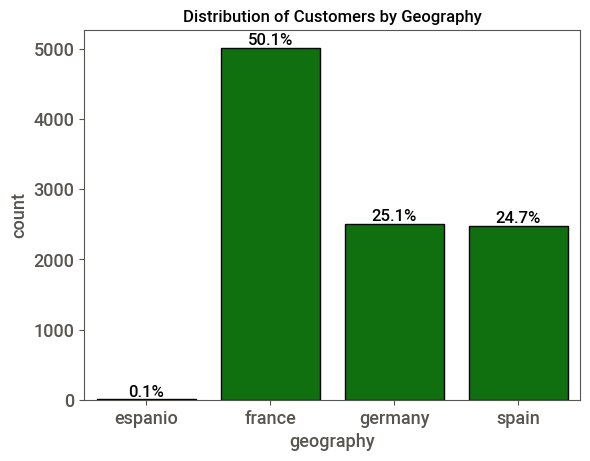

In [41]:
ax=sns.countplot(x=df['geography'], edgecolor='black',color='green')
total = len(df['geography'])
for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), va='bottom', ha='center', size=12)

plt.xlabel('geography', size=13)
plt.ylabel('count', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Distribution of Customers by Geography")
plt.show()

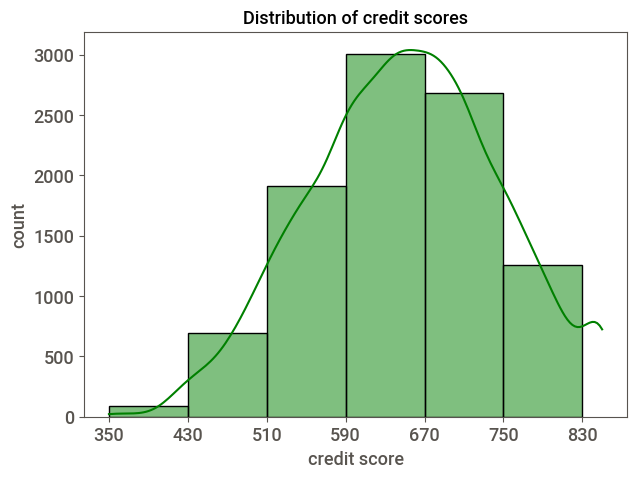

In [42]:
plt.figure(figsize=(7,5))
my_bins = range(350,900,80 )
sns.histplot(df['credit_score'], bins=my_bins, edgecolor='black',color='green',kde=True)  # Adjust the range based on your data
plt.xlabel('credit score',size=13)
plt.ylabel('count',size=13)
plt.title('Distribution of credit scores',size=13)
plt.xticks(range(350,900,80 ),size=13) 
plt.yticks(size=13)

plt.show()

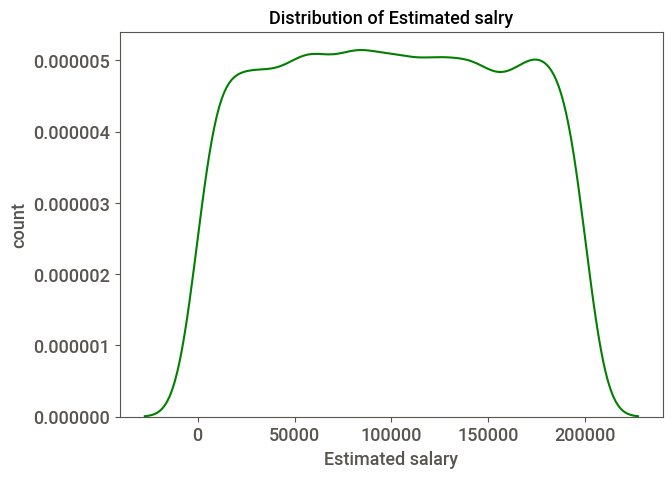

In [43]:
plt.figure(figsize=(7,5))
sns.kdeplot(df['estimated_salary'],color='green')
plt.title('Distribution of Estimated salry',size=13)
plt.xlabel('Estimated salary',size=13)
plt.ylabel('count',size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()


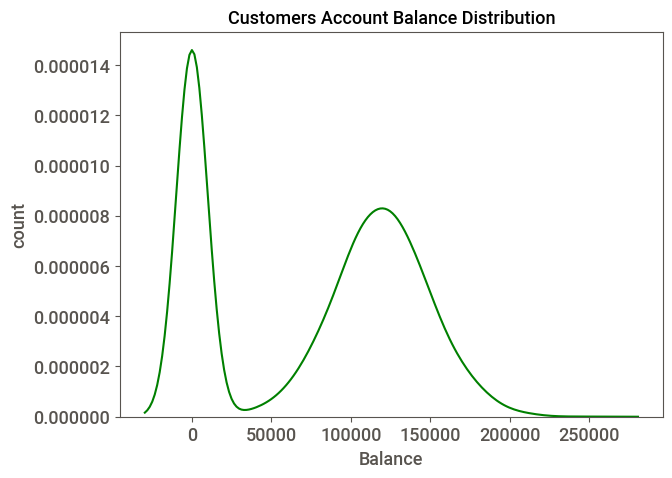

In [44]:
plt.figure(figsize=(7,5))
sns.kdeplot(df['balance'],color='green')
plt.title('Customers Account Balance Distribution',size=13)
plt.xlabel('Balance',size=13)
plt.ylabel('count',size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

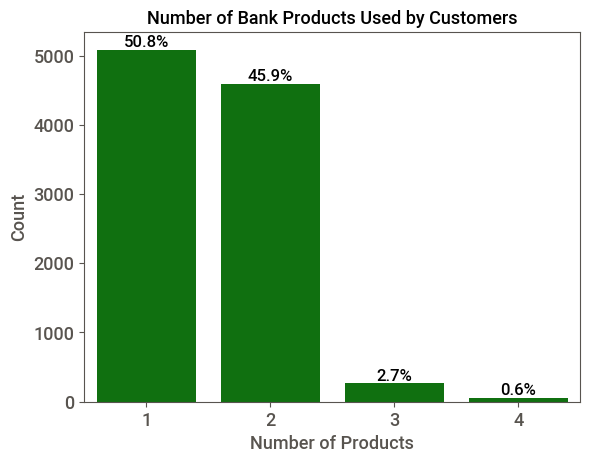

In [45]:
ax = sns.barplot(x=df['num_of_products'].value_counts().index, y=df['num_of_products'].value_counts(),color='green')
total = len(df['num_of_products'])

for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), va='bottom', ha='center', size=12)

plt.xlabel('Number of Products', size=13)
plt.ylabel('Count', size=13)
plt.title('Number of Bank Products Used by Customers', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()


# Bivariate

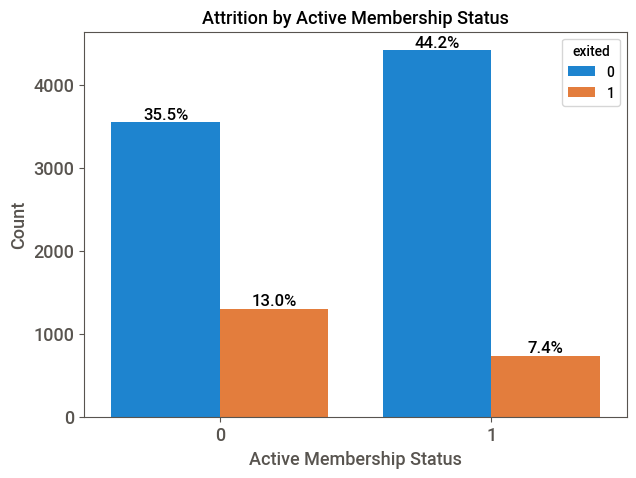

In [46]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x=df['is_active_member'], hue=df['exited'])
total = len(df['exited'])

for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    if percentage != '0.0%':
        ax.annotate(percentage, (x, y), va='bottom', ha='center', size=12)


plt.xlabel('Active Membership Status', size=13)
plt.ylabel('Count', size=13)
plt.title('Attrition by Active Membership Status', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

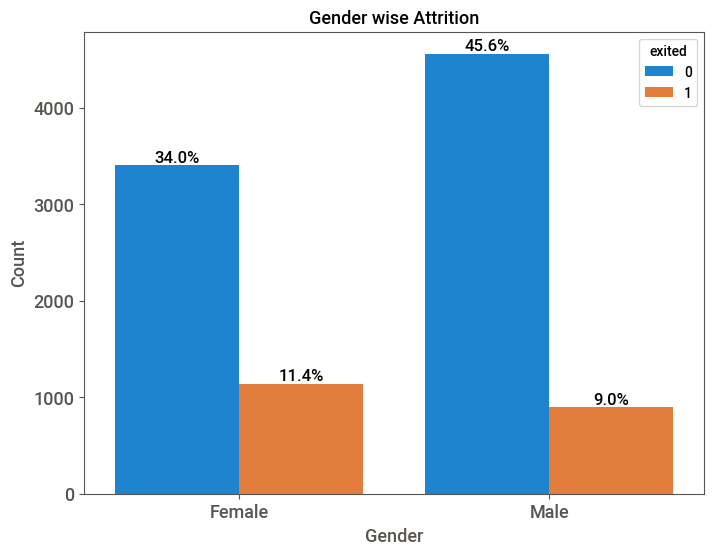

In [47]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x=df['gender'], hue=df['exited'])
total = len(df['exited'])

for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    if percentage != '0.0%':
        ax.annotate(percentage, (x, y), va='bottom', ha='center', size=12)

plt.xlabel('Gender', size=13)
plt.ylabel('Count', size=13)
plt.title('Gender wise Attrition', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

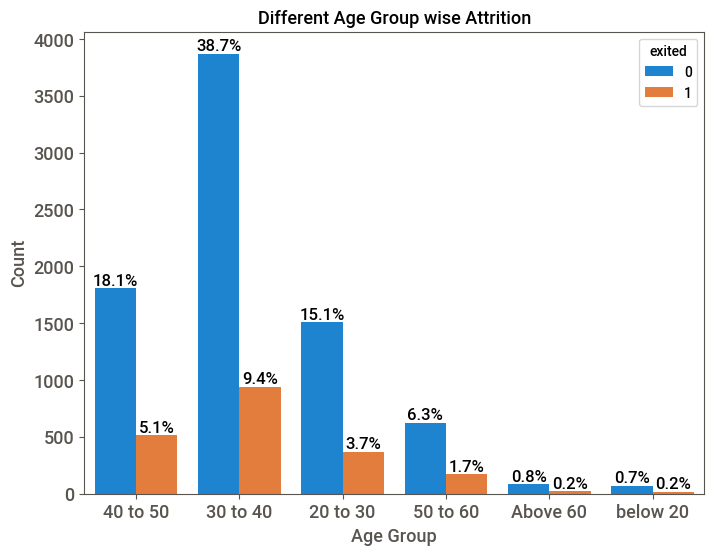

In [48]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x=df['age_cat'], hue=df['exited'])
total = len(df['exited'])

for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    if percentage != '0.0%':
        ax.annotate(percentage, (x, y), va='bottom', ha='center', size=12)

plt.xlabel('Age Group', size=13)
plt.ylabel('Count', size=13)
plt.title('Different Age Group wise Attrition', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

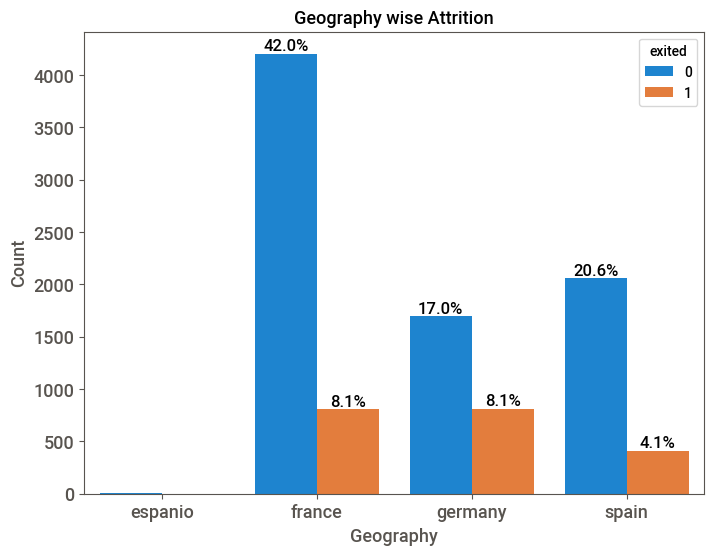

In [49]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x=df['geography'], hue=df['exited'])
total = len(df['exited'])

for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    if percentage != '0.0%':
        ax.annotate(percentage, (x, y), va='bottom', ha='center', size=12)

plt.xlabel('Geography', size=13)
plt.ylabel('Count', size=13)
plt.title('Geography wise Attrition', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

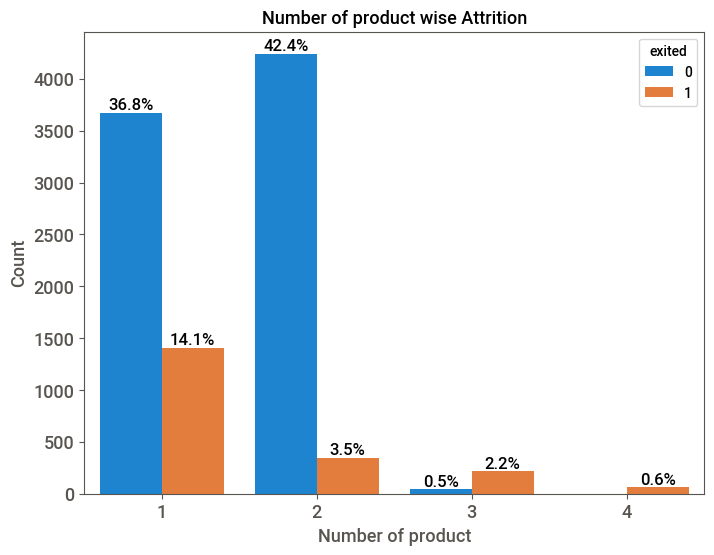

In [50]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x=df['num_of_products'], hue=df['exited'])
total = len(df['exited'])

for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    if percentage != '0.0%':
        ax.annotate(percentage, (x, y), va='bottom', ha='center', size=12)

plt.xlabel('Number of product', size=13)
plt.ylabel('Count', size=13)
plt.title('Number of product wise Attrition', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

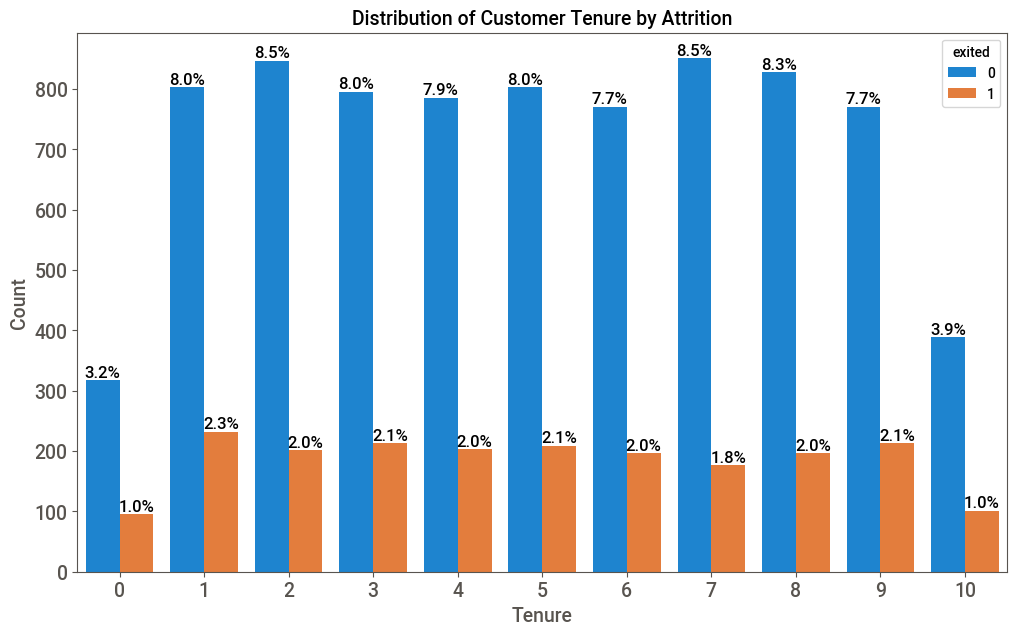

In [51]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x=df['tenure'], hue=df['exited'])
total = len(df['exited'])
for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    if percentage != '0.0%':
        ax.annotate(percentage, (x, y), va='bottom', ha='center', size=12)
plt.xlabel('Tenure', size=14)
plt.ylabel('Count', size=14)
plt.title('Distribution of Customer Tenure by Attrition', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

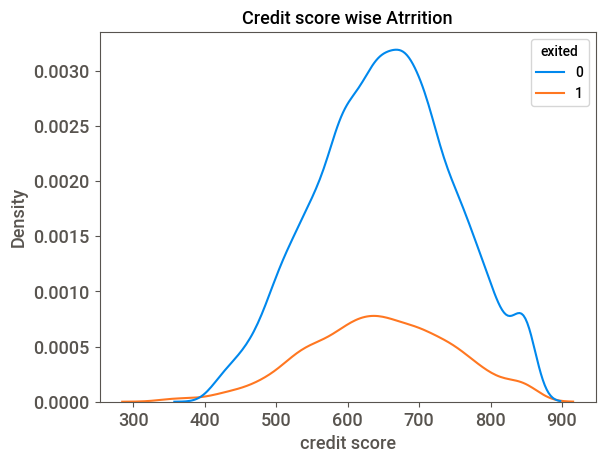

In [52]:
sns.kdeplot(x=df['credit_score'],hue=df['exited'])
plt.title('Credit score wise Atrrition',size=13)
plt.xlabel('credit score',size=13)
plt.ylabel('Density',size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

In [53]:
df.num_of_products.value_counts()

1    5084
2    4590
3     266
4      60
Name: num_of_products, dtype: int64

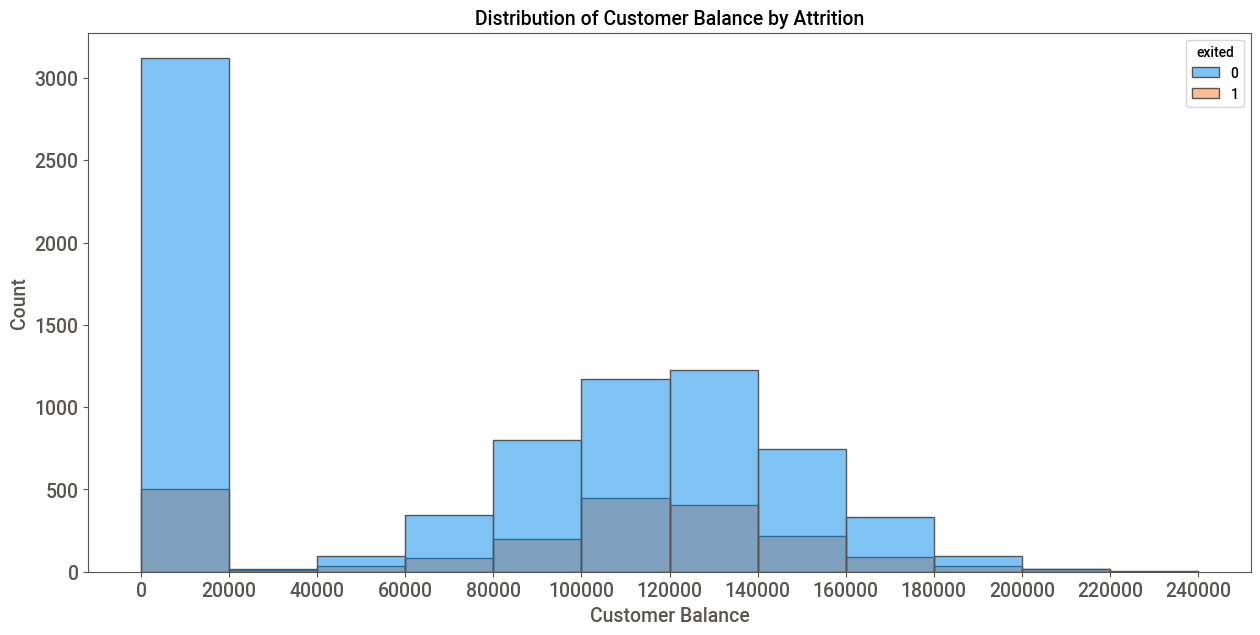

In [54]:
plt.figure(figsize=(15,7))
my_bins2 = list(range(0, 250001, 20000))
sns.histplot(x='balance', hue='exited', data=df, bins=my_bins2)
plt.xlabel('Customer Balance',size=14)
plt.ylabel('Count',size=14)
plt.title('Distribution of Customer Balance by Attrition',size=14)
plt.xticks(my_bins2,size=14)
plt.yticks(size=14)

plt.show()

# multivariate

In [55]:
who_left = df[(df['exited'] == 1) & (df['age'] >= 20) & (df['age'] <= 50)&
                (df['credit_score'] >= 550) & (df['credit_score'] <= 750)& 
               (df['tenure']>=2)]
who_left.shape

(1029, 14)

In [56]:
who_about_to_leave = df[(df['exited'] == 0) & (df['age'] >= 20) & (df['age'] <= 50)&
                (df['credit_score'] >= 550) & (df['credit_score'] <= 750)
               & (df['tenure']==2)]
who_about_to_leave.shape

(491, 14)

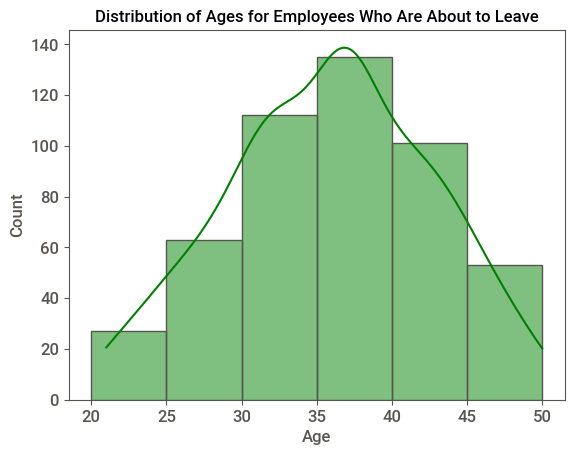

In [57]:
age_new_bin = range(20, 51, 5)
sns.histplot(x=who_about_to_leave['age'], bins=age_new_bin,kde=True,color='green')
plt.xlabel('Age', size=12)
plt.ylabel('Count', size=12)
plt.title('Distribution of Ages for Employees Who Are About to Leave',size=12)
plt.xticks(age_new_bin, size=12)
plt.yticks(size=12)
plt.show()



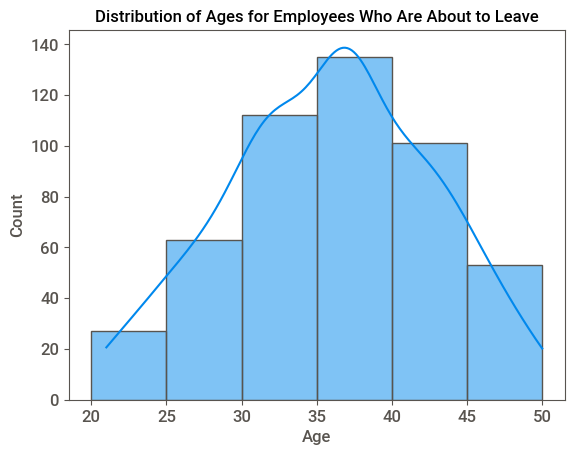

In [58]:
age_new_bin = range(20, 51, 5)
sns.histplot(x=who_about_to_leave['age'], bins=age_new_bin,kde=True)
plt.xlabel('Age', size=12)
plt.ylabel('Count', size=12)
plt.title('Distribution of Ages for Employees Who Are About to Leave',size=12)
plt.xticks(age_new_bin, size=12)
plt.yticks(size=12)
plt.show()

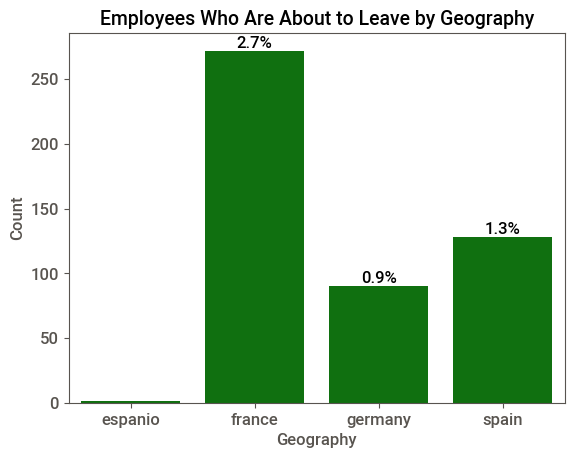

In [59]:
ax = sns.countplot(x=who_about_to_leave['geography'],color='green')
plt.xlabel('Geography', size=12)
plt.ylabel('Count', size=12)
plt.xticks( size=12)
plt.yticks(size=12)
plt.title('Employees Who Are About to Leave by Geography', size=14)
total = len(df['geography'])
for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    if percentage != '0.0%':
        ax.annotate(percentage, (x, y), va='bottom', ha='center', size=12)
plt.show()

In [60]:
who_about_to_leave.balance.describe()

count       491.000000
mean      72025.765625
std       61239.921875
min           0.000000
25%           0.000000
50%       89696.843750
75%      125616.660156
max      200117.765625
Name: balance, dtype: float64

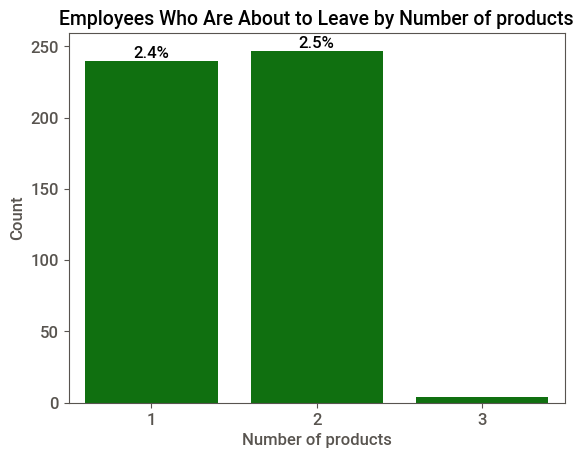

In [61]:
ax = sns.countplot(x=who_about_to_leave['num_of_products'],color='green')
plt.xlabel('Number of products', size=12)
plt.ylabel('Count', size=12)
plt.xticks( size=12)
plt.yticks(size=12)
plt.title('Employees Who Are About to Leave by Number of products', size=14)
total = len(df['num_of_products'])
for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    if percentage != '0.0%':
        ax.annotate(percentage, (x, y), va='bottom', ha='center', size=12)
plt.show()

In [62]:
who_about_to_leave

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,age_cat
1,15647311,Hill,608,spain,Female,41.0,1,83807.859375,1,0,1,112542.578125,0,40 to 50
3,15701354,Boni,699,france,Female,39.0,1,0.000000,2,0,0,93826.632812,0,30 to 40
55,15760861,Phillipps,619,france,Male,43.0,1,125211.921875,1,1,1,113410.492188,0,40 to 50
66,15696061,Brownless,581,germany,Female,43.0,1,101633.039062,1,1,0,110431.507812,0,40 to 50
80,15706021,Buley,665,france,Female,32.0,1,96645.539062,2,0,0,171413.656250,0,30 to 40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,15653037,Parks,609,france,Male,37.0,1,0.000000,1,0,1,18708.759766,0,30 to 40
9948,15735078,Onwughara,724,germany,Female,37.0,1,139687.656250,2,1,1,12913.919922,0,30 to 40
9957,15672237,Oluchi,633,france,Male,37.0,1,0.000000,1,1,0,100598.976562,0,30 to 40
9979,15692664,Diribe,677,france,Female,37.0,1,90022.851562,1,0,1,2988.280029,0,30 to 40


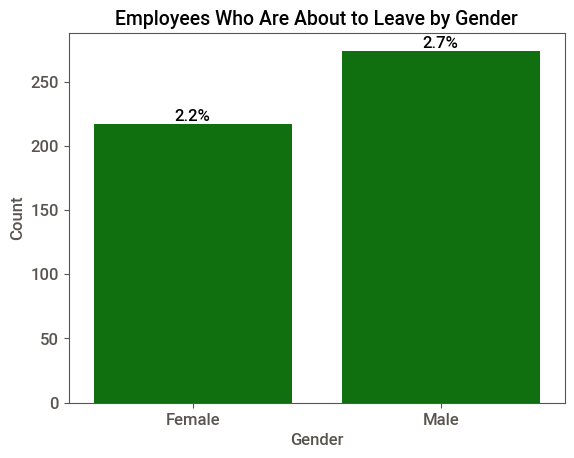

In [63]:
ax = sns.countplot(x=who_about_to_leave['gender'],color='green')
plt.xlabel('Gender', size=12)
plt.ylabel('Count', size=12)
plt.xticks( size=12)
plt.yticks(size=12)
plt.title('Employees Who Are About to Leave by Gender', size=14)
total = len(df['gender'])
for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    if percentage != '0.0%':
        ax.annotate(percentage, (x, y), va='bottom', ha='center', size=12)
plt.show()

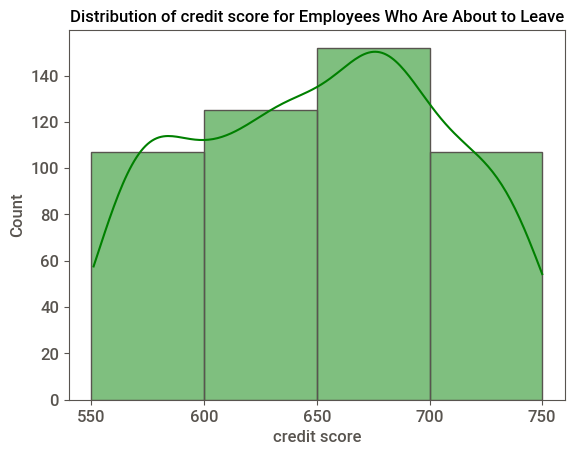

In [64]:
cre_new_bin = range(550, 800, 50)
sns.histplot(x=who_about_to_leave['credit_score'], bins=cre_new_bin,kde=True,color='green')
plt.xlabel('credit score',size=12)
plt.ylabel('Count', size=12)
plt.title('Distribution of credit score for Employees Who Are About to Leave',size=12)
plt.xticks(cre_new_bin, size=12)
plt.yticks(size=12)
plt.show()

In [65]:
who_about_to_leave.credit_score.describe()

count    491.000000
mean     650.973523
std       55.419010
min      551.000000
25%      605.000000
50%      654.000000
75%      694.000000
max      750.000000
Name: credit_score, dtype: float64

# Machine Learning Classification

In [66]:
df = pd.read_csv("DS_C12_S2_Classification_BankChurn_Data_Project.csv")
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [109]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [68]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [69]:
my_encoder = LabelEncoder()
my_scaler = StandardScaler()

In [70]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [71]:
df.drop(columns=['CustomerId','Surname'],inplace=True)

In [ ]:
my_scale_col = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
my_encode_columns =['Geography','Gender','HasCrCard','IsActiveMember','Exited']

In [ ]:
scaled_df = df[my_scale_col].copy()
for i in scaled_df.columns:
    scaled_df[i] = my_scaler.fit_transform(scaled_df[i].to_numpy().reshape(-1,1))

encoded_df = df[my_encode_columns].copy()
for i in encoded_df.columns:
    encoded_df[i] = my_encoder.fit_transform(encoded_df[i])

encoded_df.head(2)
scaled_df.head(2)
df2 = pd.concat([scaled_df,encoded_df],axis=1)
df2.head(2)

In [159]:
x = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

# Logistic Regression

In [76]:
log_reg = LogisticRegression()

In [77]:
log_reg.fit(x_train,y_train)


LogisticRegression()

In [78]:
log_reg.score(x_train,y_train)*100

80.75

In [79]:
log_reg_pred = log_reg.predict(x_test)
log_reg_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
print(f1_score(y_test,log_reg_pred)*100)

27.00587084148728


### OVER FITTING PROBLEM 

TPR 155.06533914125697
FPR 307.440203562341


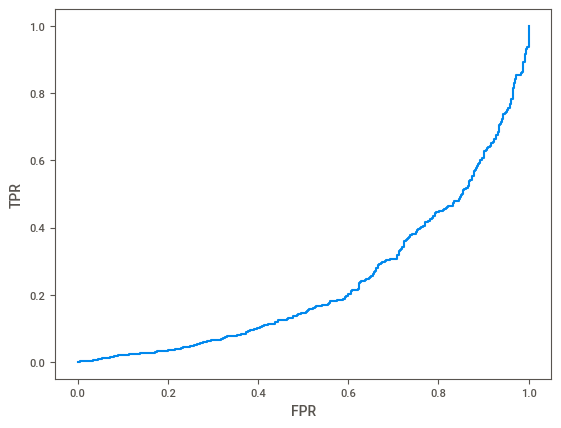

In [167]:
y_proba = log_reg.predict_proba(x_test)
fpr , tpr , thresholds = metrics.roc_curve(y_test , y_proba[:,-1],pos_label=0 )
plt.plot(fpr,tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
print('TPR',tpr.sum())
print('FPR',fpr.sum())

plt.show()

#### Over fitting 

## BAGGING METHOD

In [82]:
RFC = RandomForestClassifier(oob_score=True)

In [83]:
rskf = RepeatedStratifiedKFold(n_splits=3)


In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
hyprmtr = {
    "max_depth":[15,20,25],
    "criterion":["gini","entropy"],
    "n_estimators":[50,70]
}

In [86]:
grid_search = GridSearchCV(RFC,param_grid=hyprmtr,cv=rskf,scoring="f1_weighted")

In [87]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(oob_score=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 25], 'n_estimators': [50, 70]},
             scoring='f1_weighted')

In [88]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=70,
                       oob_score=True)

In [89]:
RFC_best = RandomForestClassifier(criterion='entropy',max_depth=20,n_estimators=70,oob_score=True,random_state=42)

In [90]:
RFC_best.fit(x_train,y_train)
RFC_best

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=70,
                       oob_score=True, random_state=42)

In [91]:
cv = cross_val_score(RFC_best,x,y,cv=rskf,scoring='f1_weighted').mean()


In [165]:
cv*100

84.55883566521119

In [92]:
RFC_best.oob_score_*100 # Testing performance 

85.55

In [93]:
RFC_best_pred = RFC_best.predict(x_test)
RFC_best_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

TPR 101.06969508400748
FPR 269.96437659033074


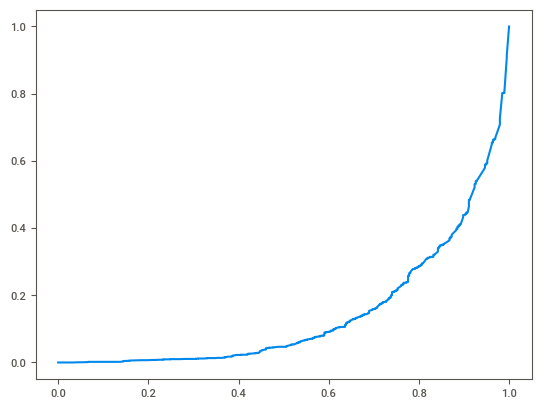

In [170]:
y_proba = RFC_best.predict_proba(x_test)
fpr , tpr , thresholds = metrics.roc_curve(y_test , y_proba[:,-1],pos_label=0 )
plt.plot(fpr,tpr)
print('TPR',tpr.sum())
print('FPR',fpr.sum())
plt.show()

# With important Feature 

In [94]:
RFC_best.feature_importances_

array([0.14648553, 0.23258975, 0.08414864, 0.14262838, 0.12797107,
       0.15182721, 0.03767798, 0.02107343, 0.0202629 , 0.0353351 ])

In [95]:
x # age, estimated , credit score , no of products , balance

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography,Gender,HasCrCard,IsActiveMember
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,0,0,1,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,3,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,-0.066419,0,1,1,0
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.027988,0,1,1,1
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.008643,0,0,0,1
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,-0.125231,2,1,1,0


In [96]:
imp_train = df2[['Age','Balance','NumOfProducts','CreditScore','EstimatedSalary']]

In [97]:
x_train_imp,x_test_imp,y_train_imp,y_test_imp = train_test_split(imp_train,y,train_size=0.8,random_state=42)

In [98]:
grid_search.fit(x_train_imp,y_train_imp)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(oob_score=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 25], 'n_estimators': [50, 70]},
             scoring='f1_weighted')

In [99]:
#grid_search = GridSearchCV(RFC,param_grid=hyprmtr,cv=rskf,scoring="f1_weighted")

In [100]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=70,
                       oob_score=True)

In [101]:
RFC_best_with_imp_feat = RandomForestClassifier(criterion='entropy',max_depth=15,n_estimators=70,oob_score=True,random_state=42)

In [102]:
RFC_best_with_imp_feat.fit(x_train_imp,y_train_imp)
RFC_best_with_imp_feat

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=70,
                       oob_score=True, random_state=42)

In [103]:
cv_imp_feat = cross_val_score(RFC_best_with_imp_feat,x,y,cv=rskf,scoring='f1_weighted').mean()

In [104]:
cv_imp_feat*100 # 

84.50415873309393

In [105]:
RFC_best_with_imp_feat.oob_score_*100

83.3875

## Stakking

In [121]:
base = list()
def stacking():
    
    
    # BASE MODELS 
    base.append(('DT',DecisionTreeClassifier()))
    base.append(('SV', SVC()))
    base.append(('Naiv bayes',GaussianNB()))
    
    
    #META MODEL
    meta = LogisticRegression()
    
    st = StackingClassifier(estimators=base,final_estimator=meta)
    
    print(base)
    
    return(st)
    
    
    

In [122]:
stacting1 = stacking()

[('DT', DecisionTreeClassifier()), ('SV', SVC()), ('Naiv bayes', GaussianNB())]


In [125]:
cv_st = cross_val_score(stacting1,x,y,cv=4,scoring='f1_weighted').mean()


0.8411305756137099

In [126]:
cv_st*100

84.11305756137098

## RANDOM FOREST TAKING AS FINAL MODEL BECAUSE THERE SLIGHT DIFFERENCE WITH RANDOM FOREST AND STACKING

In [127]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography,Gender,HasCrCard,IsActiveMember
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,0,0,1,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,3,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,-0.066419,0,1,1,0
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.027988,0,1,1,1
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.008643,0,0,0,1
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,-0.125231,2,1,1,0


In [142]:
df.Gender.describe()

count     10000
unique        2
top        Male
freq       5457
Name: Gender, dtype: object

In [152]:
my_array = np.array([[]])
print('_'*110)
print('_'*110)
for C in range(300,901):
    C=int(input('Enter Credit score between 300-900 --> '))
    if C>=300 and C<=900:
        my_array=np.concatenate((my_array,np.array([[C]])),axis=1) 
        break
    else:
        print('Entered Wrong input')
print('_'*110)


for A in range(0,61):
    A = int(input('Enter Age Between 0-60--> '))
    if A>0 and A<=60:
        my_array=np.concatenate((my_array,np.array([[A]])),axis=1) 
        break
    else:
        print('Entered Wrong input')
        

for T in range(0,11):
    T = int(input('Enter Tenure Range between 0-10--> '))
    if T>=0 and T<=11:
        my_array=np.concatenate((my_array,np.array([[T]])),axis=1) 
        break
    else:
        print('Entered Wrong input')
print('_'*110)    

for B in range(0,250000):
    B = int(input('Enter Balance Range between 0-250000--> '))
    if B>=0 and B<=250000:
        my_array=np.concatenate((my_array,np.array([[B]])),axis=1) 
        break
    else:
        print('Entered Wrong input')
        
print('_'*110)
for P in range(0,5):
    p = int(input('Enter Number of products  Between 0-4--> '))
    if P>=0 and P<=4:
        my_array=np.concatenate((my_array,np.array([[P]])),axis=1) 
        break
    else:
        print('Entered Wrong input')
print('_'*110)

for S in range(0,200000):
    S=int(input('Enter Estimated Salary Range between 0-200000--> '))
    if S>=0 and S<=200000:
        my_array=np.concatenate((my_array,np.array([[S]])),axis=1) 
        break
    else:
        print('Entered Wrong input')
        
for G in (0,4):
    G=int(input('Enter Gohrapy if Espanio(0) if France(1) / if Germany(2) / if Spain(3)--> '))
    if G>=0 and G<=3:
        my_array=np.concatenate((my_array,np.array([[G]])),axis=1) 
        break
    else:
        print('Entered Wrong input')
print('-'*110)

for GN in (0,2):
    GN=int(input('Enter Gender if Male(0) / if Female(1)'))
    if GN>=0 and GN<=1:
        my_array=np.concatenate((my_array,np.array([[GN]])),axis=1) 
        break
    else:
        print('Entered Wrong input')

for R in (0,2):
    R=int(input('Enter Status of credit card If Card have 1 / if Not 0-->'))
    if R>=0 and R<=1:
        my_array=np.concatenate((my_array,np.array([[A]])),axis=1) 
        break
    else:
        print('Entered Wrong input')

for R in (0,2):
    R=int(input('Enter If the member is active press 1 If not press 0-->'))
    if R>=0 and R<=1:
        my_array=np.concatenate((my_array,np.array([[A]])),axis=1) 
        break
    else:
        print('Entered Wrong input')

print('-'*110)        
print('-'*110)


pred_cost = RFC_best.predict(my_array)

if pred_cost==1:
    print('Customer is about to leave')
else:
    print('Customer is not leaving')

______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
Enter Credit score between 300-900 --> 300
______________________________________________________________________________________________________________
Enter Age Between 0-60--> 1
Enter Tenure Range between 0-10--> 1
______________________________________________________________________________________________________________
Enter Balance Range between 0-250000--> 1
______________________________________________________________________________________________________________
Enter Number of products  Between 0-4--> 1
______________________________________________________________________________________________________________
Enter Estimated Salary Range between 0-200000--> 1
Enter Gohrapy if France(0) / if Germany(1) / if Spain(2)--> 1
----------------------------